## Add a new test

['costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 'costi', 

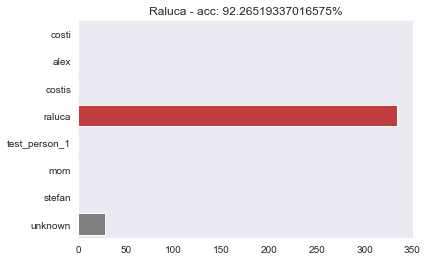

{'costi': 0, 'alex': 0, 'costis': 0, 'raluca': 334, 'test_person_1': 0, 'mom': 0, 'stefan': 0, 'unknown': 28}


In [1]:
import json
import pickle

import promptlib
import matplotlib.pyplot as plt
from face_recognition.web_prediction import predict
from test.video_prediction import produce_video
from face_recognition.api import get_known_people_from_encodings, get_known_people_from_dataset
import seaborn as sns

method = input('Test by:\n (1) Webcam\n(2) video')
output_faces = []
person_name = ''

if method != '1' and method != '2':
    exit(1)
elif method == '1':
    name = input("Enter your name: ")
    faces = predict()
    names_in_db = get_known_people_from_dataset()
    x = {}
    for nume in names_in_db:
        x[nume] = (faces.count(nume))
    x['unknown'] = faces.count('unknown')
    print(x)
    keys = [j for j in x.keys()]
    values = [j for j in x.values()]

    sns.set_style('dark')
    acc = x[name] * 100 / sum(values)

    sns.barplot(x=values, y=keys).set_title(f'{name.capitalize()} - acc: {acc}%')
    plt.show()

    print(x)
elif method == '2':
    prompter = promptlib.Files()
    abs_path_to_video = prompter.file()
    person_name = abs_path_to_video.split('.')[0].split('/')[-1]
    output_faces = produce_video(abs_path_to_video)
    prompter.dst()

    print('Done.')


In [2]:
import random


def return_results(output_faces, person_name):
    for i in range(len(output_faces)):
        output_faces[i] = output_faces[i].lower()
    output_name = person_name

    if person_name.startswith('stock'):
        person_name = 'unknown'

    person_name = person_name.lower()

    acc = output_faces.count(person_name) * 100 / len(output_faces)
    known_encodings = get_known_people_from_encodings()
    for i in range(len(known_encodings)):
        known_encodings[i] = known_encodings[i].lower()

    names = {'unknown': output_faces.count('unknown')}
    for name in known_encodings:
        names[name] = output_faces.count(name.lower())
    return [output_name.lower(), names, acc]


list = return_results(output_faces, person_name)
print(list)

with open(f'results/{list[0]}.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(list, filehandle)

ZeroDivisionError: division by zero

In [ ]:
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns


def plot_all_data():
    directory = 'results'
    objs = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and filename.endswith('data'):
            with open(f, 'rb') as filehandle:
                # read the data as binary data stream
                while 1:
                    try:
                        objs.append(pickle.load(filehandle))
                    except EOFError:
                        break
    sns.set_style('darkgrid')
    for results in objs:
        actual_name = results[0]
        output_faces = results[1]
        acc = results[2]
        print('Accuracy= ', acc, '%')

        keys = [j for j in output_faces.keys()]
        values = [j for j in output_faces.values()]
        sns.barplot(x=values, y=keys).set_title(actual_name)
        plt.show()


plot_all_data()